<a href="https://colab.research.google.com/github/moazamnafees/T-20-Match-Prediction-Model-Using-Neural-Network/blob/main/Semester_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                   venue               bat_team                    bowl_team  \
0  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
1  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
2  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
3  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
4  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   

       batsman   bowler  total  
0   SC Ganguly  P Kumar    222  
1  BB McCullum  P Kumar    222  
2  BB McCullum  P Kumar    222  
3  BB McCullum  P Kumar    222  
4  BB McCullum  P Kumar    222  


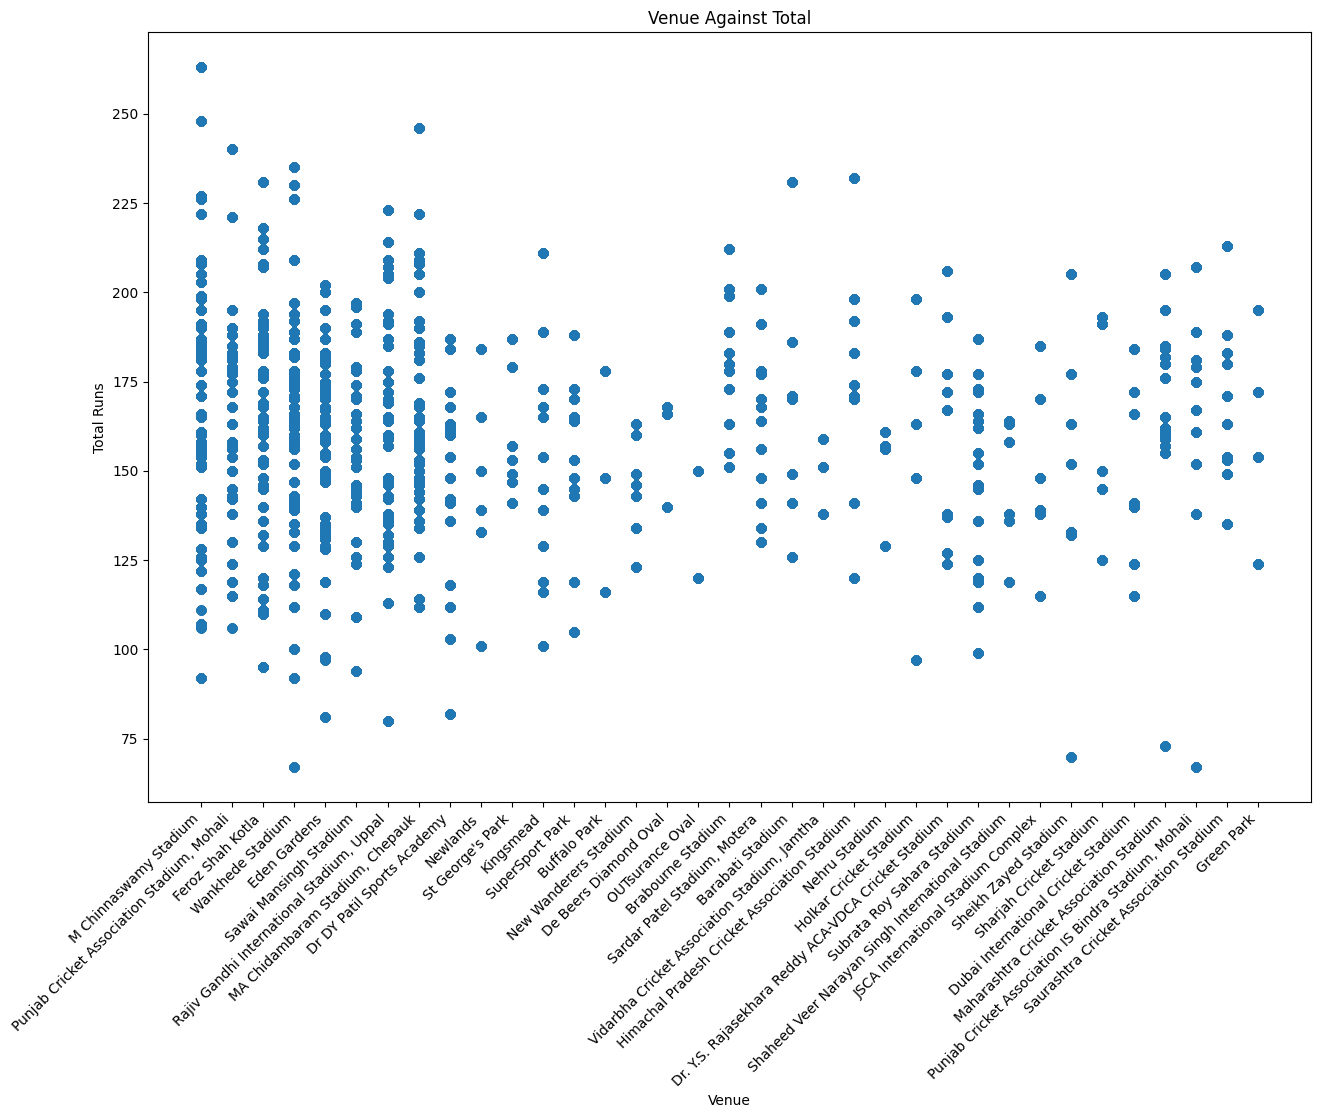

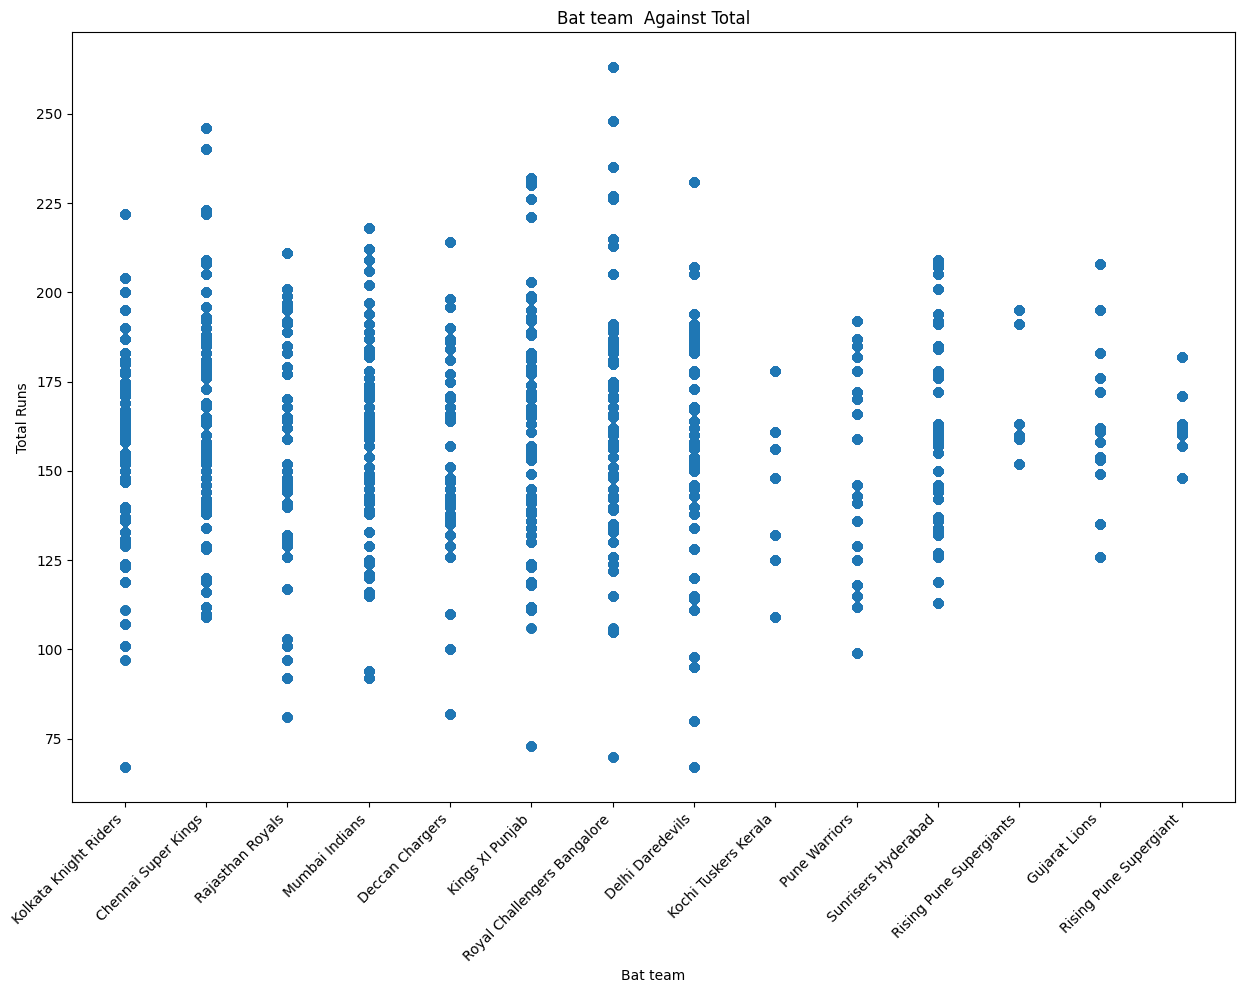

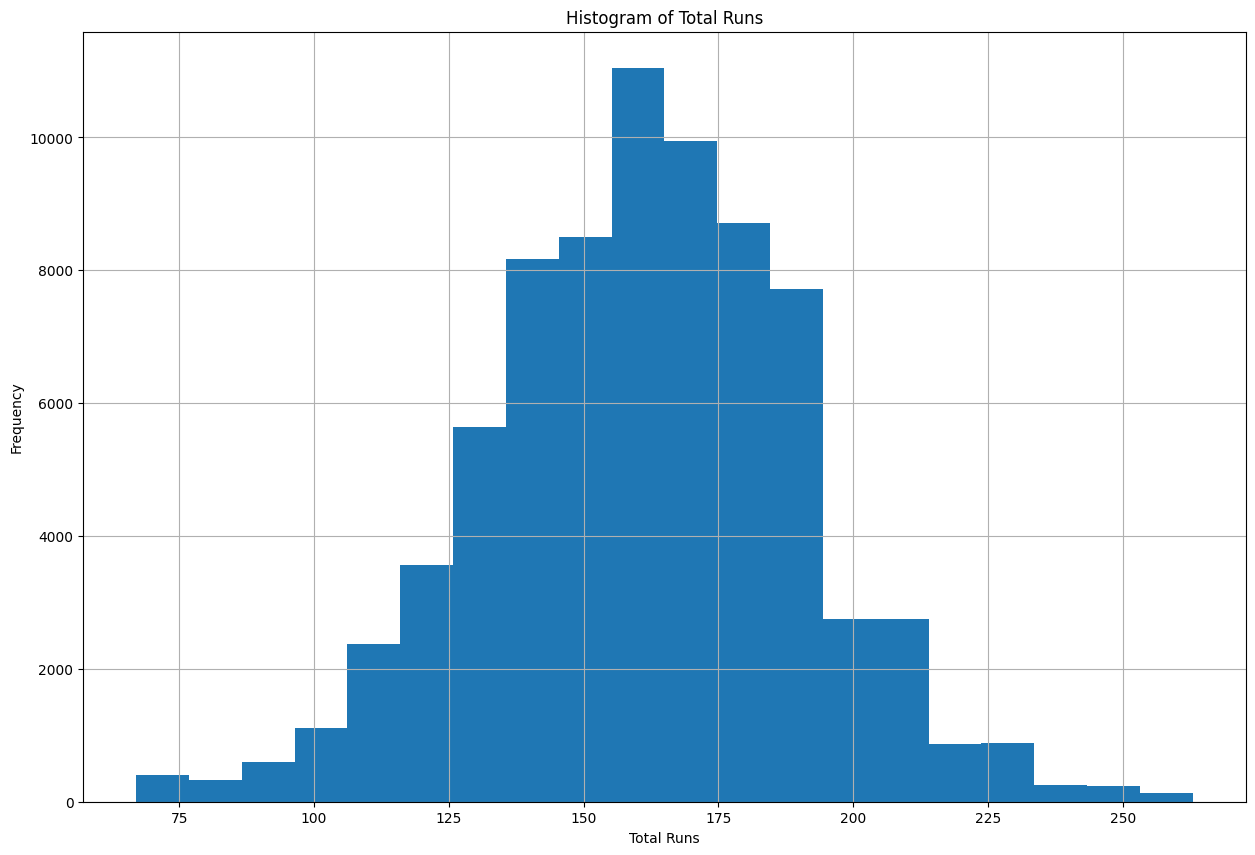

Epoch 1/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 45.3668 - mse: 4653.0977 - val_loss: 22.2281 - val_mse: 850.5640
Epoch 2/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 22.5009 - mse: 874.2979 - val_loss: 21.9645 - val_mse: 837.6279
Epoch 3/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 22.2123 - mse: 852.3955 - val_loss: 23.5179 - val_mse: 923.7946
Epoch 4/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 22.3220 - mse: 859.6895 - val_loss: 24.7064 - val_mse: 1023.3791
Epoch 5/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 22.4274 - mse: 870.5149 - val_loss: 22.2573 - val_mse: 854.7114
Epoch 6/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 22.3263 - mse: 860.9542 - val_loss: 21.7465 - val_mse: 823.9529
Epoch 7/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 22.3296 - mse: 866.2858 - val_loss: 21.4492 - val_mse: 812.2069
Epoch 8/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 21.7174 - mse: 834.9903 - val_loss: 21.8307 - val_mse: 83

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

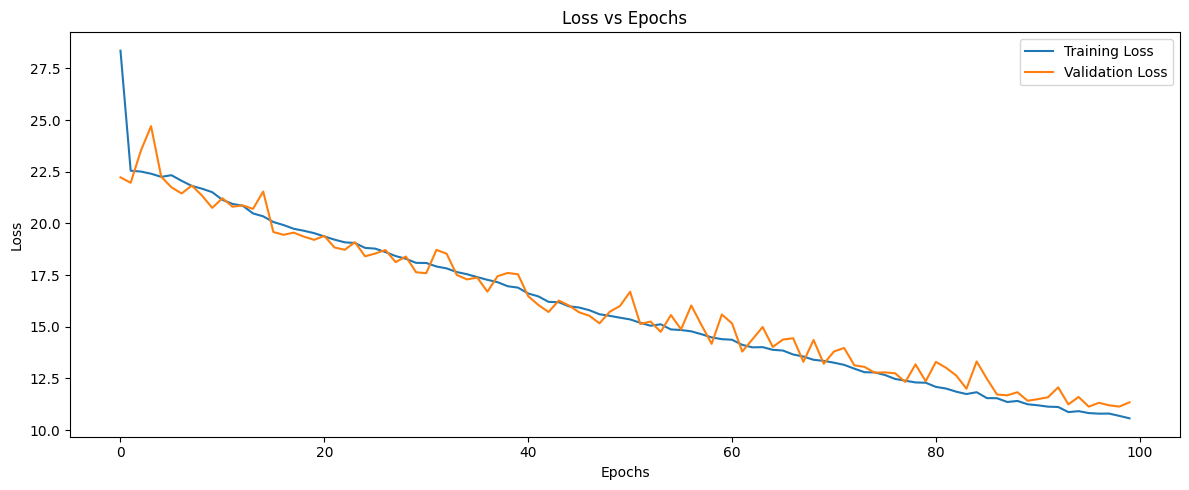

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings

warnings.filterwarnings("ignore")

# Load dataset
ipl = pd.read_csv('ipl_data.csv')

# Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'mid', 'striker', 'non-striker'], axis=1)
X = df.drop(['total'], axis=1)
y = df['total']
print(df.head())



plt.figure(figsize=(15, 10))
plt.scatter(df['venue'], df['total'])
plt.xlabel('Venue')
plt.ylabel('Total Runs')
plt.title('Venue Against Total')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(15, 10))
plt.scatter(df['bat_team'], df['total'])
plt.xlabel('Bat team')
plt.ylabel('Total Runs')
plt.title('Bat team  Against Total')
plt.xticks(rotation=45, ha='right')

plt.figure(figsize=(15, 10))
df['total'].hist(bins=20)
plt.title('Histogram of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


# Label Encoding
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss , metrics=['mse'])

# Train the model
histroy = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))


# MAE to check performance
predictions = model.predict(X_test_scaled)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")

# Widgets for prediction
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')
predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

# Prediction function
def predict_score(b):
    with output:
        clear_output()  # Clear previous output

        # Encode the dropdown values
        try:
            encoded_venue = venue_encoder.transform([venue.value])
            encoded_batting_team = batting_team_encoder.transform([batting_team.value])
            encoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
            encoded_striker = striker_encoder.transform([striker.value])
            encoded_bowler = bowler_encoder.transform([bowler.value])
        except ValueError as e:
            print(f"Error: {e}")
            return

        # Prepare input
        input_data = np.array([encoded_venue[0], encoded_batting_team[0], encoded_bowling_team[0],
                               encoded_striker[0], encoded_bowler[0]])
        input_data = input_data.reshape(1, -1)

        # Scale input
        try:
            input_scaled = scaler.transform(input_data)
        except ValueError as e:
            print(f"Error in scaling input: {e}")
            return

        # Predict score
        predicted_score = model.predict(input_scaled)
        predicted_score = int(predicted_score[0, 0])  # Extract scalar value

        # Display prediction
        print(f"Predicted Score: {predicted_score}")

# Bind button click event
predict_button.on_click(predict_score)

# Display widgets
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


train_loss = histroy.history['loss']
val_loss = histroy.history['val_loss']


# Plot Loss vs Epochs
plt.figure(figsize=(12, 5))

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()


plt.tight_layout()
plt.show()